In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
def Walk(NSteps = 1000, l=1):


    x = np.zeros(NSteps)
    y = np.zeros(NSteps)
    d = np.zeros(NSteps)
    dt = np.zeros(NSteps)

 

    for i in range(1,NSteps):
    
        alpha = 2.*np.pi*(np.random.rand()-0.5)
    
        x[i] = x[i-1] + l*np.cos(alpha)
        y[i] = y[i-1] + l*np.sin(alpha)
        d[i] = np.sqrt(x[i]**2+y[i]**2)
        dt[i] = l*np.sqrt(float(i))
        
    R2 = x[-1]**2+y[-1]**2
    
    return {'x':x,'y':y,'d':d,'dt':dt,'R2':R2}

In [4]:
def Ensemble(NSteps=1000, N=6):
    e = {}
    for i in range(N):
        e[i] = Walk(NSteps=NSteps)
        #print(i)
    return e

In [5]:
def Average(E):
    
    R2 = np.zeros(len(E))
    for k in E.keys():
        R2[k] = E[k]['R2']
        
    return np.mean(R2)

In [6]:
# Crear el ensamble

E = Ensemble(NSteps = 1000, N=31)

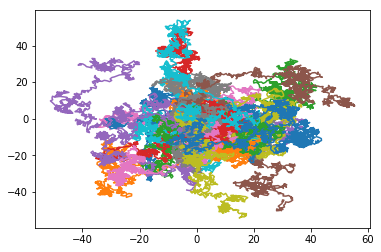

In [7]:
plt.figure()

for k in E.keys():
    plt.plot(E[k]['x'],E[k]['y'])

In [8]:
N_list = [10, 100, 500, 1000, 5000, 10000, 20000, 100000]
R2 = np.zeros(len(N_list))
D = np.zeros(len(N_list))

for i in range(len(N_list)):
    E = Ensemble(NSteps=N_list[i], N=30)
    R2[i] = Average(E)

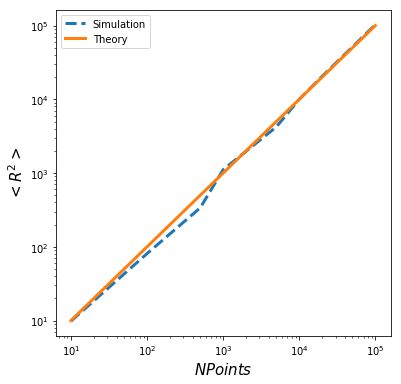

In [21]:
plt.figure(figsize=(6,6))
plt.plot(N_list, R2, '--',label='Simulation', linewidth=3)
plt.plot(N_list, N_list, label='Theory', linewidth=3)
plt.loglog()
plt.legend()
plt.xlabel(r'$NPoints$',fontsize=15)
plt.ylabel(r'$<R^{2}>$',fontsize=15)
plt.savefig('RelacionEinstein.png')

In [10]:
E2 = Ensemble(NSteps = 10000, N=4)

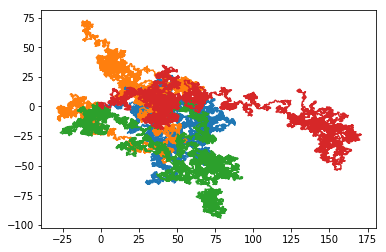

In [11]:
plt.figure()

for k in E2.keys():
    plt.plot(E2[k]['x'],E2[k]['y'])

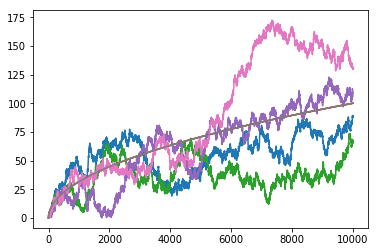

In [12]:
plt.figure()

for k in E2.keys():
    plt.plot(E2[k]['d'])
    plt.plot(E2[k]['dt'])